# Uczenie maszynowe (laboratorium 2)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


pd.options.display.max_columns = None

### Wczytanie zbioru, trochę o zbiorze danych

In [3]:
polish_companies_bankruptcy = fetch_ucirepo(id=365) # wczytanie zbioru
X = polish_companies_bankruptcy.data.features # cechy
y = polish_companies_bankruptcy.data.targets # target

df = pd.concat([X, y], axis = 1) # połączenie X i y w jedną tabelę
df

year        A1       A2        A3       A4        A5       A6  \
0         1  0.200550  0.37951  0.396410  2.04720   32.3510  0.38825   
1         1  0.209120  0.49988  0.472250  1.94470   14.7860  0.00000   
2         1  0.248660  0.69592  0.267130  1.55480   -1.1523  0.00000   
3         1  0.081483  0.30734  0.458790  2.49280   51.9520  0.14988   
4         1  0.187320  0.61323  0.229600  1.40630   -7.3128  0.18732   
...     ...       ...      ...       ...      ...       ...      ...   
43400     5  0.012898  0.70621  0.038857  1.17220  -18.9070  0.00000   
43401     5 -0.578050  0.96702 -0.800850  0.16576  -67.3650 -0.57805   
43402     5 -0.179050  1.25530 -0.275990  0.74554 -120.4400 -0.17905   
43403     5 -0.108860  0.74394  0.015449  1.08780  -17.0030 -0.10886   
43404     5 -0.105370  0.53629 -0.045578  0.91478  -56.0680 -0.10537   

             A7       A8       A9       A10       A11       A12       A13  \
0      0.249760  1.33050  1.13890  0.504940  0.249760  0.659800  0.166600   
1      0.258340  0.99601  1.69960  0.497880  0.261140  0.516800  0.158350   
2      0.309060  0.43695  1.30900  0.304080  0.312580  0.641840  0.244350   
3      0.092704  1.86610  1.05710  0.573530  0.092704  0.301630  0.094257   
4      0.187320  0.63070  1.15590  0.386770  0.187320  0.331470  0.121820   
...         ...      ...      ...       ...       ...       ...       ...   
43400  0.013981  0.41600  1.67680  0.293790  0.041583  0.061959  0.023622   
43401 -0.578050 -0.40334  0.93979 -0.390040 -0.578050 -0.602160 -0.110220   
43402 -0.154930 -0.26018  1.17490 -0.326590 -0.154930 -0.142840 -0.072940   
43403 -0.109180  0.12531  0.84516  0.093224 -0.109180 -0.620380 -0.065652   
43404 -0.109940  0.86460  0.95040  0.463670 -0.109940 -0.205570 -0.066747   

            A14      A15       A16      A17       A18       A19      A20  \
0      0.249760   497.42  0.733780  2.63490  0.249760  0.149420  43.3700   
1      0.258340   677.96  0.538380  2.00050  0.258340  0.152000  87.9810   
2      0.309060   794.16  0.459610  1.43690  0.309060  0.236100  73.1330   
3      0.092704   917.01  0.398030  3.25370  0.092704  0.071428  79.7880   
4      0.187320  1133.20  0.322110  1.63070  0.187320  0.115530  57.0450   
...         ...      ...       ...      ...       ...       ...      ...   
43400  0.013981  6507.60  0.056089  1.41600  0.013981  0.008338  27.0920   
43401 -0.578050  -742.28 -0.491730  1.03410 -0.578050 -0.133990   3.2965   
43402 -0.154930 -3298.20 -0.110670  0.79665 -0.154930 -0.081350  37.0460   
43403 -0.109180 -5352.10 -0.068197  1.34420 -0.109180 -0.141280  26.2850   
43404 -0.109940 -2055.90 -0.177540  1.86470 -0.109940 -0.077072  47.1990   

           A21       A22       A23      A24       A25       A26       A27  \
0      1.24790  0.214020  0.119980  0.47706  0.504940  0.604110   1.45820   
1      1.42930  0.248060  0.123040      NaN  0.395420  0.439920  88.44400   
2      1.42830  0.302600  0.189960      NaN  0.289320  0.372820  86.01100   
3      1.50690  0.115500  0.062782  0.17193  0.573530  0.361520   0.94076   
4          NaN  0.198320  0.115530  0.18732  0.386770  0.322110   1.41380   
...        ...       ...       ...      ...       ...       ...       ...   
43400  1.03300  0.040401  0.007692  0.90184  0.083706  0.054556   1.46370   
43401  0.64770 -0.534920 -0.133990 -0.57805 -0.390040 -0.491730       NaN   
43402  0.83104  0.176700 -0.094015 -0.15493 -0.326590 -0.129880       NaN   
43403  1.12100 -0.099950 -0.140860 -0.10918  0.093224 -0.067762       NaN   
43404  0.71351 -0.082947 -0.073868 -0.10994  0.463670 -0.169020       NaN   

             A28     A29      A30       A31      A32     A33      A34  \
0       1.761500  5.9443  0.11788  0.149420   94.140  3.8772  0.56393   
1      16.946000  3.6884  0.26969  0.152000  122.170  2.9876  2.98760   
2       1.062700  4.3749  0.41929  0.238150  176.930  2.0630  1.42740   
3       1.961800  4.6511  0.14343  0.071428   91.370  3.9948  0.37581   
4       1.1184

In [4]:
print(polish_companies_bankruptcy.metadata['additional_info']['summary']) 

The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, http://www.securities.com), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.
Basing on the collected data five classification cases were distinguished, that depends on the forecasting period:
- 1stYear â€“ the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
- 2ndYear â€“ the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 1017

X1	net profit / total assets <br>
X2	total liabilities / total assets <br>
X3	working capital / total assets <br>
X4	current assets / short-term liabilities <br>
X5	[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 <br>
X6	retained earnings / total assets <br>
X7	EBIT / total assets <br>
X8	book value of equity / total liabilities <br>
X9	sales / total assets <br>
X10	equity / total assets <br>
X11	(gross profit + extraordinary items + financial expenses) / total assets <br>
X12	gross profit / short-term liabilities <br>
X13	(gross profit + depreciation) / sales <br>
X14	(gross profit + interest) / total assets <br>
X15	(total liabilities * 365) / (gross profit + depreciation) <br>
X16	(gross profit + depreciation) / total liabilities <br>
X17	total assets / total liabilities <br>
X18	gross profit / total assets <br>
X19	gross profit / sales <br>
X20	(inventory * 365) / sales <br>
X21	sales (n) / sales (n-1) <br>
X22	profit on operating activities / total assets <br>
X23	net profit / sales <br>
X24	gross profit (in 3 years) / total assets <br>
X25	(equity - share capital) / total assets <br>
X26	(net profit + depreciation) / total liabilities <br>
X27	profit on operating activities / financial expenses <br>
X28	working capital / fixed assets <br>
X29	logarithm of total assets <br>
X30	(total liabilities - cash) / sales <br>
X31	(gross profit + interest) / sales <br>
X32	(current liabilities * 365) / cost of products sold <br>
X33	operating expenses / short-term liabilities <br>
X34	operating expenses / total liabilities <br>
X35	profit on sales / total assets <br>
X36	total sales / total assets <br>
X37	(current assets - inventories) / long-term liabilities <br>
X38	constant capital / total assets <br>
X39	profit on sales / sales <br>
X40	(current assets - inventory - receivables) / short-term liabilities <br>
X41	total liabilities / ((profit on operating activities + depreciation) * (12/365)) <br>
X42	profit on operating activities / sales <br>
X43	rotation receivables + inventory turnover in days <br>
X44	(receivables * 365) / sales <br>
X45	net profit / inventory <br>
X46	(current assets - inventory) / short-term liabilities <br>
X47	(inventory * 365) / cost of products sold <br>
X48	EBITDA (profit on operating activities - depreciation) / total assets <br>
X49	EBITDA (profit on operating activities - depreciation) / sales <br>
X50	current assets / total liabilities <br>
X51	short-term liabilities / total assets <br>
X52	(short-term liabilities * 365) / cost of products sold <br>
X53	equity / fixed assets <br>
X54	constant capital / fixed assets <br>
X55	working capital <br>
X56	(sales - cost of products sold) / sales <br>
X57	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) <br>
X58	total costs /total sales <br>
X59	long-term liabilities / equity <br>
X60	sales / inventory <br>
X61	sales / receivables <br>
X62	(short-term liabilities *365) / sales <br>
X63	sales / short-term liabilities <br>
X64	sales / fixed assets

### Eksploracyjna analiza danych (EDA)

In [5]:
def df_by_year(year, df = df):
    return df[df['year'] == year]

def top_missing_values(df):
    df_nan = pd.DataFrame((df.isna().sum() / len(df)).sort_values(ascending = False)).reset_index()
    if df.year.nunique() == 1:
        df_nan.columns = ['features (year ' + str(df.year.iloc[0]) + ')', 'missing value % (year ' + str(df.year.iloc[0]) + ')']
    else:
        df_nan.columns = ['features', 'missing value %']
    return df_nan

In [6]:
df_nan = top_missing_values(df)

df1 = df_by_year(1)
df1_nan = top_missing_values(df1)

df2 = df_by_year(2)
df2_nan = top_missing_values(df2)

df3 = df_by_year(3)
df3_nan = top_missing_values(df3)

df4 = df_by_year(4)
df4_nan = top_missing_values(df4)

df5 = df_by_year(5)
df5_nan = top_missing_values(df5)

pd.concat([df_nan, df1_nan, df2_nan, df3_nan, df4_nan, df5_nan], axis = 1)

features  missing value % features (year 1)  missing value % (year 1)  \
0       A37         0.437369               A37                  0.389925   
1       A21         0.134869               A21                  0.230824   
2       A27         0.063679               A27                  0.044258   
3       A60         0.049580               A60                  0.019212   
4       A45         0.049464               A45                  0.019069   
..      ...              ...               ...                       ...   
61      A57         0.000161               A23                  0.000000   
62      A59         0.000161               A20                  0.000000   
63      A55         0.000023               A19                  0.000000   
64     year         0.000000               A13                  0.000000   
65    class         0.000000             class                  0.000000   

   features (year 2)  missing value % (year 2) features (year 3)  \
0                A37                  0.444117               A37   
1                A21                  0.311019               A21   
2                A27                  0.069399               A27   
3                A60                  0.053377               A60   
4                A45                  0.053180               A45   
..               ...                       ...               ...   
61               A14                  0.000098               A29   
62               A10                  0.000098                A1   
63               A29                  0.000098               A35   
64              year                  0.000000               A36   
65             class                  0.000000             class   

    missing value % (year 3) features (year 4)  missing value % (year 4)  \
0                   0.450919               A37                  0.453636   
1                   0.076835               A27                  0.065462   
2                   0.068076               A60                  0.062704   
3                   0.056365               A45                  0.062602   
4                   0.056270               A28                  0.023591   
..                       ...               ...                       ...   
61                  0.000000               A10                  0.000102   
62                  0.000000              year                  0.000000   
63                  0.000000               A55                  0.000000   
64                  0.000000                A9                  0.000000   
65                  0.000000             class                  0.000000   

   features (year 5)  missing value % (year 5)  
0                A37                  0.431134  
1                A27                  0.066159  
2                A60                  0.045347  
3                A45                  0.045347  
4                A24                  0.022843  
..               ...                       ...  
61               A23                  0.000000  
62               A20                  0.000000  
63               A19                  0.000000  
64               A13                  0.000000  
65             class                  0.000000  

[66 rows x 12 columns]

In [7]:
df5.describe()

year           A1           A2           A3           A4  \
count  5910.0  5907.000000  5907.000000  5907.000000  5889.000000   
mean      5.0    -0.022347     0.465086     0.189155     4.892476   
std       0.0     6.163655     5.751283     1.177729    91.434574   
min       5.0  -463.890000  -430.870000   -72.067000    -0.403110   
25%       5.0     0.003965     0.255355     0.043953     1.093700   
50%       5.0     0.046670     0.451750     0.219440     1.651700   
75%       5.0     0.117050     0.661635     0.418430     2.931000   
max       5.0    87.459000    72.416000    28.336000  6845.800000   

                 A5           A6           A7           A8           A9  \
count  5.899000e+03  5907.000000  5907.000000  5892.000000  5909.000000   
mean   1.940676e+01     0.022584    -0.111951     5.737741     1.588322   
std    2.152932e+04     9.992080     9.057135   102.355101     1.548390   
min   -1.076400e+06  -463.890000  -517.480000    -3.735100    -3.496000   
25%   -4.383650e+01     0.000000     0.005889     0.481865     1.014800   
50%    4.914900e-01     0.000000     0.056500     1.149300     1.139700   
75%    4.876500e+01     0.108725     0.136905     2.771275     1.825900   
max    1.250100e+06   543.250000     5.530000  6868.500000    65.607000   

               A10          A11          A12          A13          A14  \
count  5907.000000  5907.000000  5889.000000  5910.000000  5907.000000   
mean      0.545580    -0.010092     1.065218     0.354420    -0.111926   
std       5.763742     6.063065    35.275574    30.918776     9.057136   
min     -71.444000  -463.890000  -231.850000  -310.340000  -517.480000   
25%       0.318940     0.015207     0.015605     0.024002     0.005889   
50%       0.523320     0.070762     0.167960     0.067775     0.056566   
75%       0.720805     0.148305     0.540770     0.135107     0.136950   
max     339.850000     6.388000  2470.300000  2340.200000     5.530000   

                A15          A16          A17          A18          A19  \
count  5.904000e+03  5892.000000  5892.000000  5907.000000  5910.000000   
mean   1.033617e+03     1.186271     6.834590    -0.102620    -0.090248   
std    1.301280e+05    37.321108   102.360970     9.085605     5.444892   
min   -9.632400e+06  -221.330000    -0.002321  -517.480000  -310.800000   
25%    2.338125e+02     0.074189     1.510150     0.005889     0.004098   
50%    8.721650e+02     0.236445     2.208800     0.056566     0.035204   
75%    2.255825e+03     0.637902     3.886450     0.136950     0.088418   
max    1.341700e+06  2837.400000  6869.500000    55.125000    77.244000   

               A20          A21          A22          A23          A24  \
count  5910.000000  5807.000000  5907.000000  5910.000000  5775.000000   
mean     56.671984     2.459377    -0.004537    -0.096856     0.138872   
std     168.125493   100.552690     5.632599     5.418386     7.364214   
min     -29.340000  -135.150000  -431.590000  -310.890000  -463.890000   
25%      18.280250     0.989250     0.000000     0.002571     0.020797   
50%      38.618000     1.117500     0.061066     0.030100     0.163190   
75%      67.663500     1.265750     0.136390     0.075734     0.357340   
max    9928.500000  7661.500000    15.541000    77.244000   252.340000   

               A25          A26            A27           A28          A29  \
count  5907.000000  5892.000000    5519.000000   5803.000000  5907.000000   
mean      0.375084     1.091288     463.636810     10.234075     4.153190   
std       4.135367    35.395704   10220.644305    302.282846     0.835222   
min     -71.444000  -221.330000 -158130.000000  -1089.700000     0.006359   
25%       0.178030     0.068926       0.075715      0.081587     3.648750   
50%       0.424640     0.210880       0.976060      0.526900     4.174700   
75%       0.634955     0.575897       4.135550      1.601450     4.669400   
max     266.860000  2689.100000  565940.000000  21701.000000     9.698300   

       

### Czyszczenie i obsługa nulli

In [8]:
df5_cleaned = df5.drop('A37', axis = 1) # dropujemy bo jest ponad 40% nulli
# df5_cleaned = df5_cleaned[df5_cleaned['A27'].notna()] # wycinamy wiersze gdzie A27 są nullami
for column in df5_cleaned.columns: # reszte uzupełniamy średnią
    df5_cleaned[column] = df5_cleaned[column].fillna(df[column].median())
df5_cleaned

year        A1       A2        A3       A4        A5        A6  \
37495     5  0.088238  0.55472  0.011340  1.02050  -66.5200  0.342040   
37496     5 -0.006202  0.48465  0.232980  1.59980    6.1825  0.000000   
37497     5  0.130240  0.22142  0.577510  3.60820  120.0400  0.187640   
37498     5 -0.089951  0.88700  0.269270  1.52220  -55.9920 -0.073957   
37499     5  0.048179  0.55041  0.107650  1.24370  -22.9590  0.000000   
...     ...       ...      ...       ...      ...       ...       ...   
43400     5  0.012898  0.70621  0.038857  1.17220  -18.9070  0.000000   
43401     5 -0.578050  0.96702 -0.800850  0.16576  -67.3650 -0.578050   
43402     5 -0.179050  1.25530 -0.275990  0.74554 -120.4400 -0.179050   
43403     5 -0.108860  0.74394  0.015449  1.08780  -17.0030 -0.108860   
43404     5 -0.105370  0.53629 -0.045578  0.91478  -56.0680 -0.105370   

             A7       A8       A9       A10       A11       A12       A13  \
37495  0.109490  0.57752  1.08810  0.320360  0.109490  0.197600  0.096885   
37496 -0.006202  1.06340  1.27570  0.515350  0.001329 -0.015967  0.037544   
37497  0.162120  3.05900  1.14150  0.677310  0.162120  0.732180  0.165680   
37498 -0.089951  0.12740  1.27540  0.113000 -0.080792 -0.174450  0.084038   
37499  0.059280  0.81682  1.51500  0.449590  0.091990  0.134190  0.055575   
...         ...      ...      ...       ...       ...       ...       ...   
43400  0.013981  0.41600  1.67680  0.293790  0.041583  0.061959  0.023622   
43401 -0.578050 -0.40334  0.93979 -0.390040 -0.578050 -0.602160 -0.110220   
43402 -0.154930 -0.26018  1.17490 -0.326590 -0.154930 -0.142840 -0.072940   
43403 -0.109180  0.12531  0.84516  0.093224 -0.109180 -0.620380 -0.065652   
43404 -0.109940  0.86460  0.95040  0.463670 -0.109940 -0.205570 -0.066747   

            A14      A15       A16      A17       A18       A19      A20  \
37495  0.109490  1475.20  0.247420  1.80270  0.109490  0.077287  50.1990   
37496 -0.006202  3693.40  0.098825  2.06340 -0.006202 -0.004862  59.9230   
37497  0.162120   431.75  0.845390  4.51640  0.162120  0.143490  41.5080   
37498 -0.089951  3020.50  0.120840  1.12740 -0.089951 -0.070525  47.6980   
37499  0.059280  2386.10  0.152970  1.81680  0.059280  0.039129  36.0740   
...         ...      ...       ...      ...       ...       ...      ...   
43400  0.013981  6507.60  0.056089  1.41600  0.013981  0.008338  27.0920   
43401 -0.578050  -742.28 -0.491730  1.03410 -0.578050 -0.133990   3.2965   
43402 -0.154930 -3298.20 -0.110670  0.79665 -0.154930 -0.081350  37.0460   
43403 -0.109180 -5352.10 -0.068197  1.34420 -0.109180 -0.141280  26.2850   
43404 -0.109940 -2055.90 -0.177540  1.86470 -0.109940 -0.077072  47.1990   

           A21       A22       A23       A24       A25       A26          A27  \
37495  1.15740  0.135230  0.062287  0.419490  0.320360  0.209120     1.038700   
37496  1.01580  0.001289 -0.004862  0.270012  0.080285  0.098825     0.171180   
37497  1.23620  0.145860  0.115280  0.235660  0.677310  0.701430     1.473700   
37498  1.09420  0.000000 -0.070525  0.270012  0.064737  0.120840     0.000000   
37499  0.99455  0.067616  0.031802  0.000000  0.429200  0.132800     2.067100   
...        ...       ...       ...       ...       ...       ...          ...   
43400  1.03300  0.040401  0.007692  0.901840  0.083706  0.054556     1.463700   
43401  0.64770 -0.534920 -0.133990 -0.578050 -0.390040 -0.491730  1107.969639   
43402  0.83104  0.176700 -0.094015 -0.154930 -0.326590 -0.129880  1107.969639   
43403  1.12100 -0.099950 -0.140860 -0.109180  0.093224 -0.067762  1107.969639   
43404  0.71351 -0.082947 -0.073868 -0.109940  0.463670 -0.169020  1107.969639   

            A28     A29       A30       A31      A32     A33      A34  \
37495  0.026093  6.1267  0.377880  0.077287  155.330  2.3498  0.24377   
37496  0.615450  4.0022  0.363810  0.000778  108.050  3.3779  2.70750   
37497  2.872100  4.7622  0.050069  0.143490   81.653  4.4701  0.65878   
37498  1.251900  4.0153  0.

### Outliery

In [9]:
feature_list = df5_cleaned.columns.tolist()[1:]
feature_list = [feature_list[i:(i + 8)] for i in range(0, len(feature_list), 8)]
feature_list

[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8'],
 ['A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16'],
 ['A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24'],
 ['A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32'],
 ['A33', 'A34', 'A35', 'A36', 'A38', 'A39', 'A40', 'A41'],
 ['A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'A49'],
 ['A50', 'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57'],
 ['A58', 'A59', 'A60', 'A61', 'A62', 'A63', 'A64', 'class']]

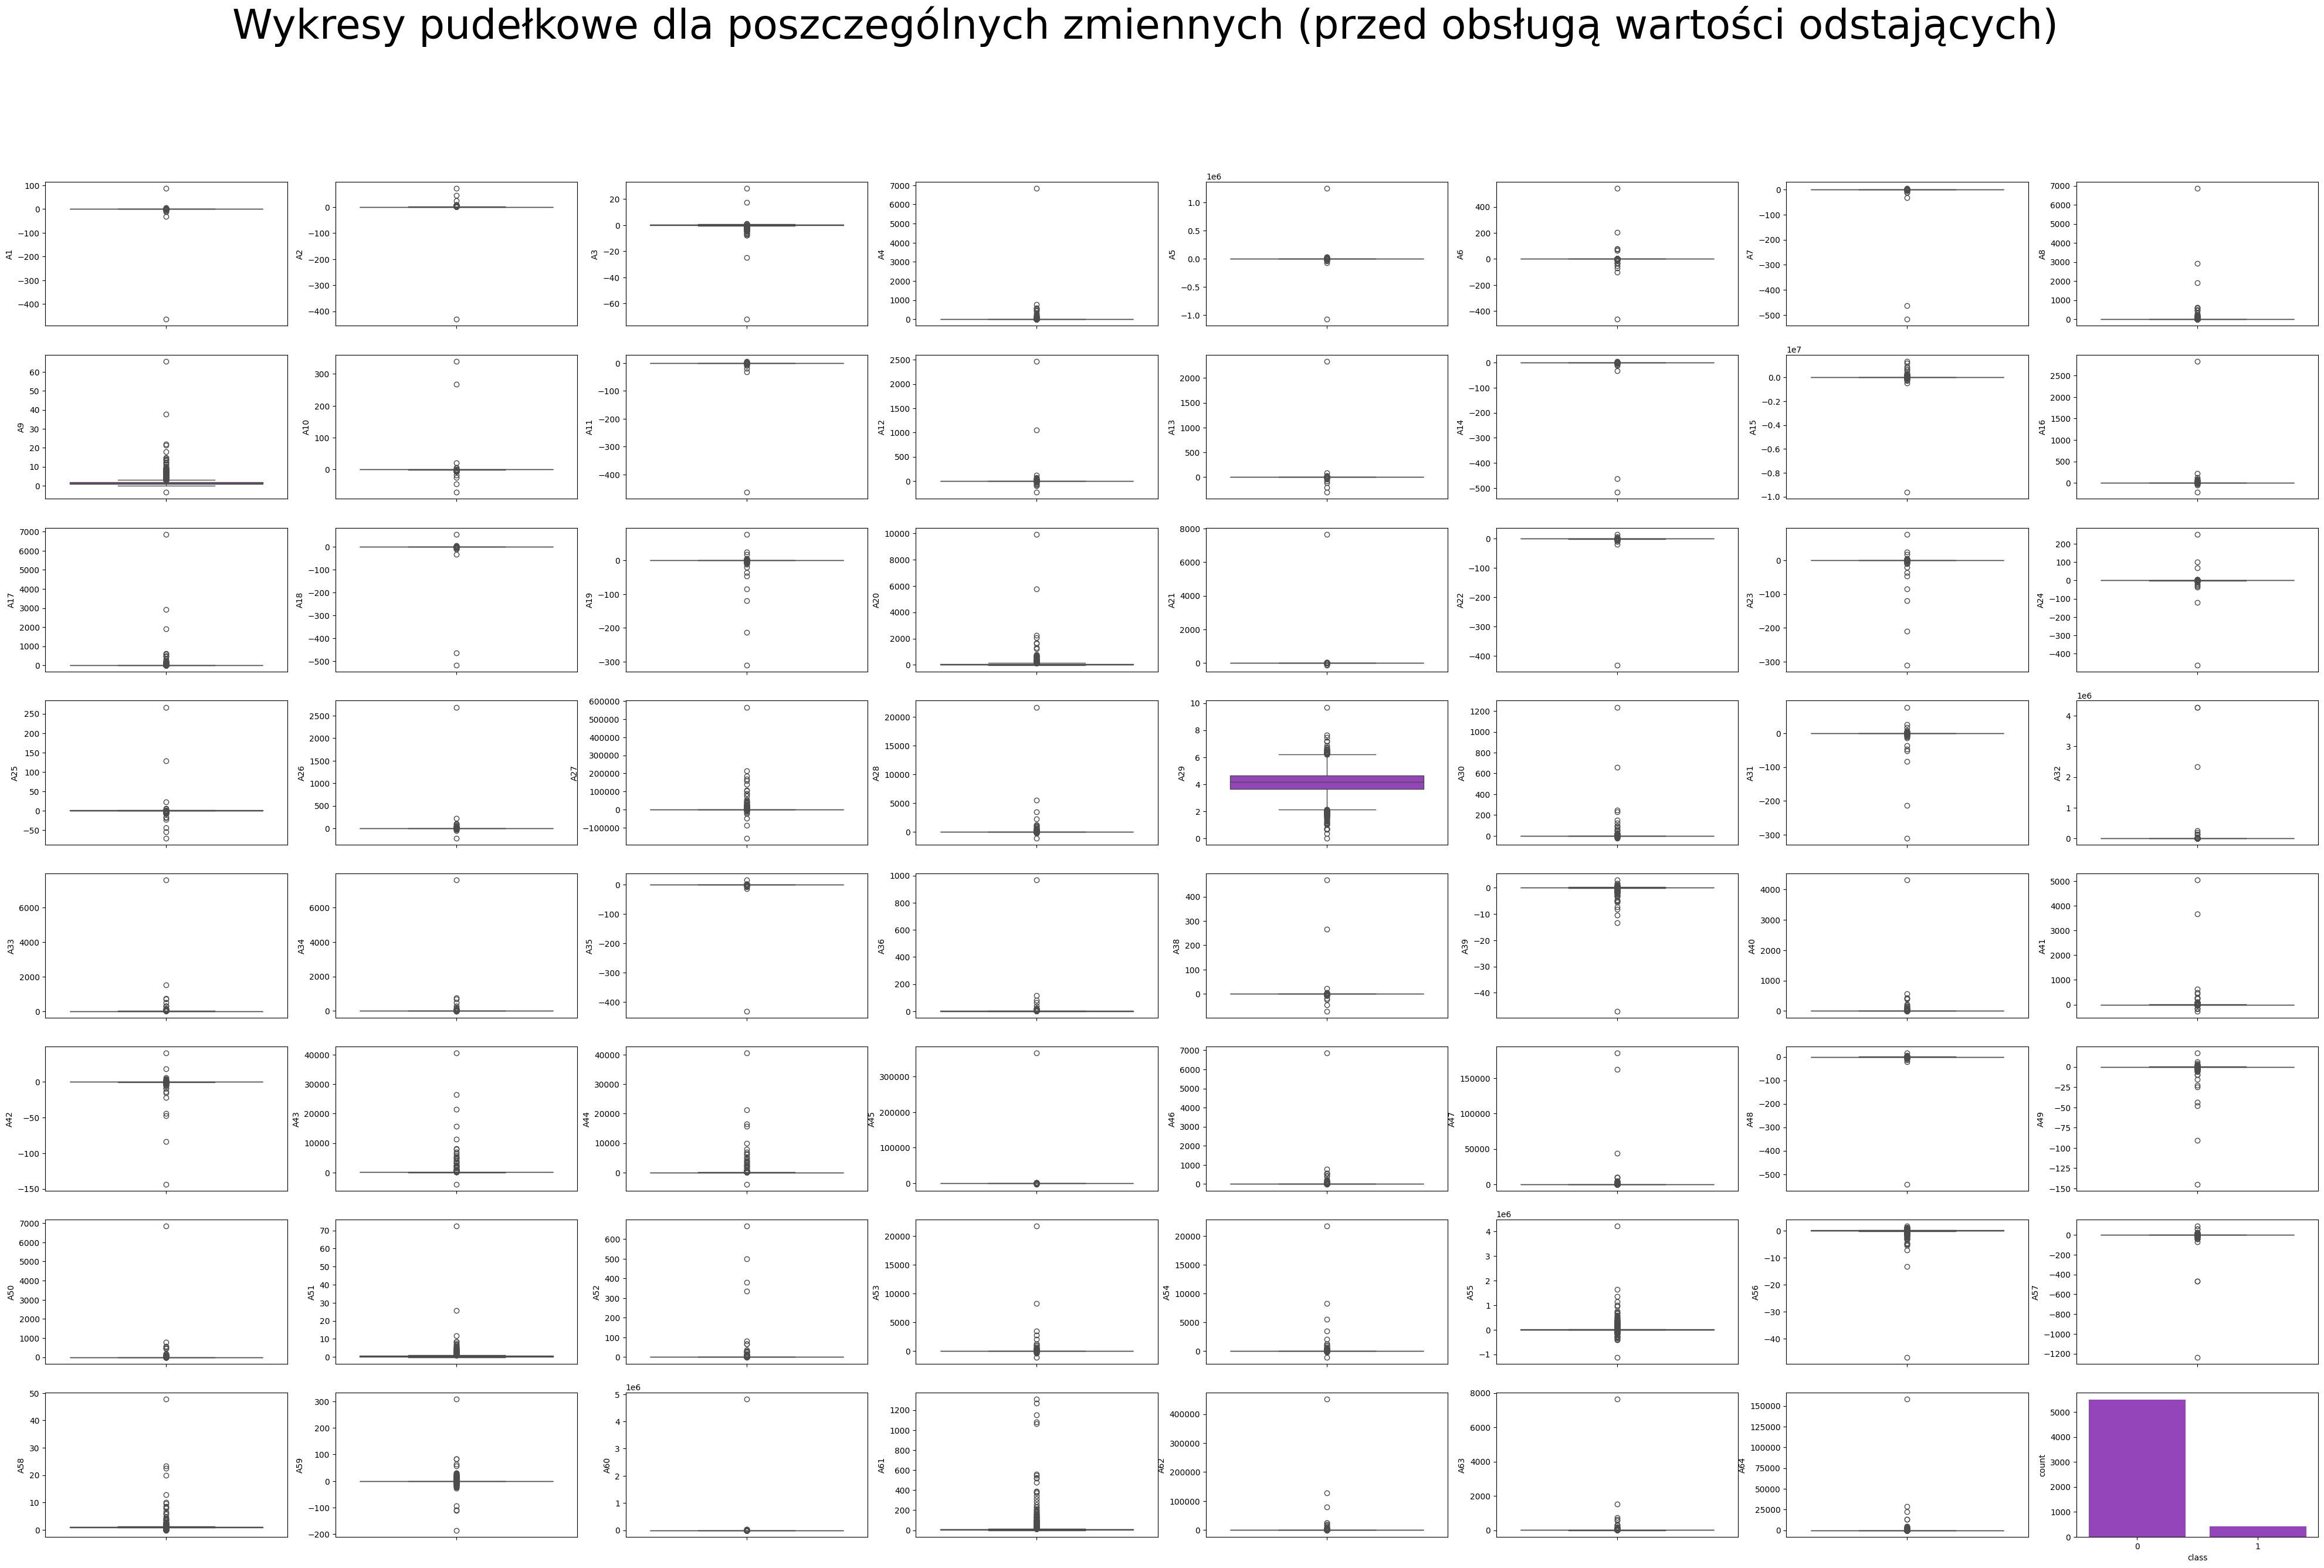

In [10]:
fig, axes = plt.subplots(8, 8, figsize=(50, 30))

for sublist in feature_list:
    for j in sublist:
        sns.boxplot(data = df5_cleaned, y = j, color = 'darkorchid', ax = axes[feature_list.index(sublist), sublist.index(j)])

axes[7, 7].clear()
sns.countplot(data = df5_cleaned, x = "class", color = 'darkorchid', ax = axes[7, 7])
        
plt.suptitle('Wykresy pudełkowe dla poszczególnych zmiennych (przed obsługą wartości odstających)', fontsize = 50)
plt.show()

In [11]:
def remove_outliers(df, alpha = 0.05):
    df.iloc[:, 1:-1] = df5_cleaned.iloc[:, 1:-1].clip(lower = df.iloc[:, 1:-1].quantile(.075), upper = df.iloc[:, 1:-1].quantile(.925), axis = 1)
    return df

In [12]:
df5_cleaned2 = remove_outliers(df5_cleaned)

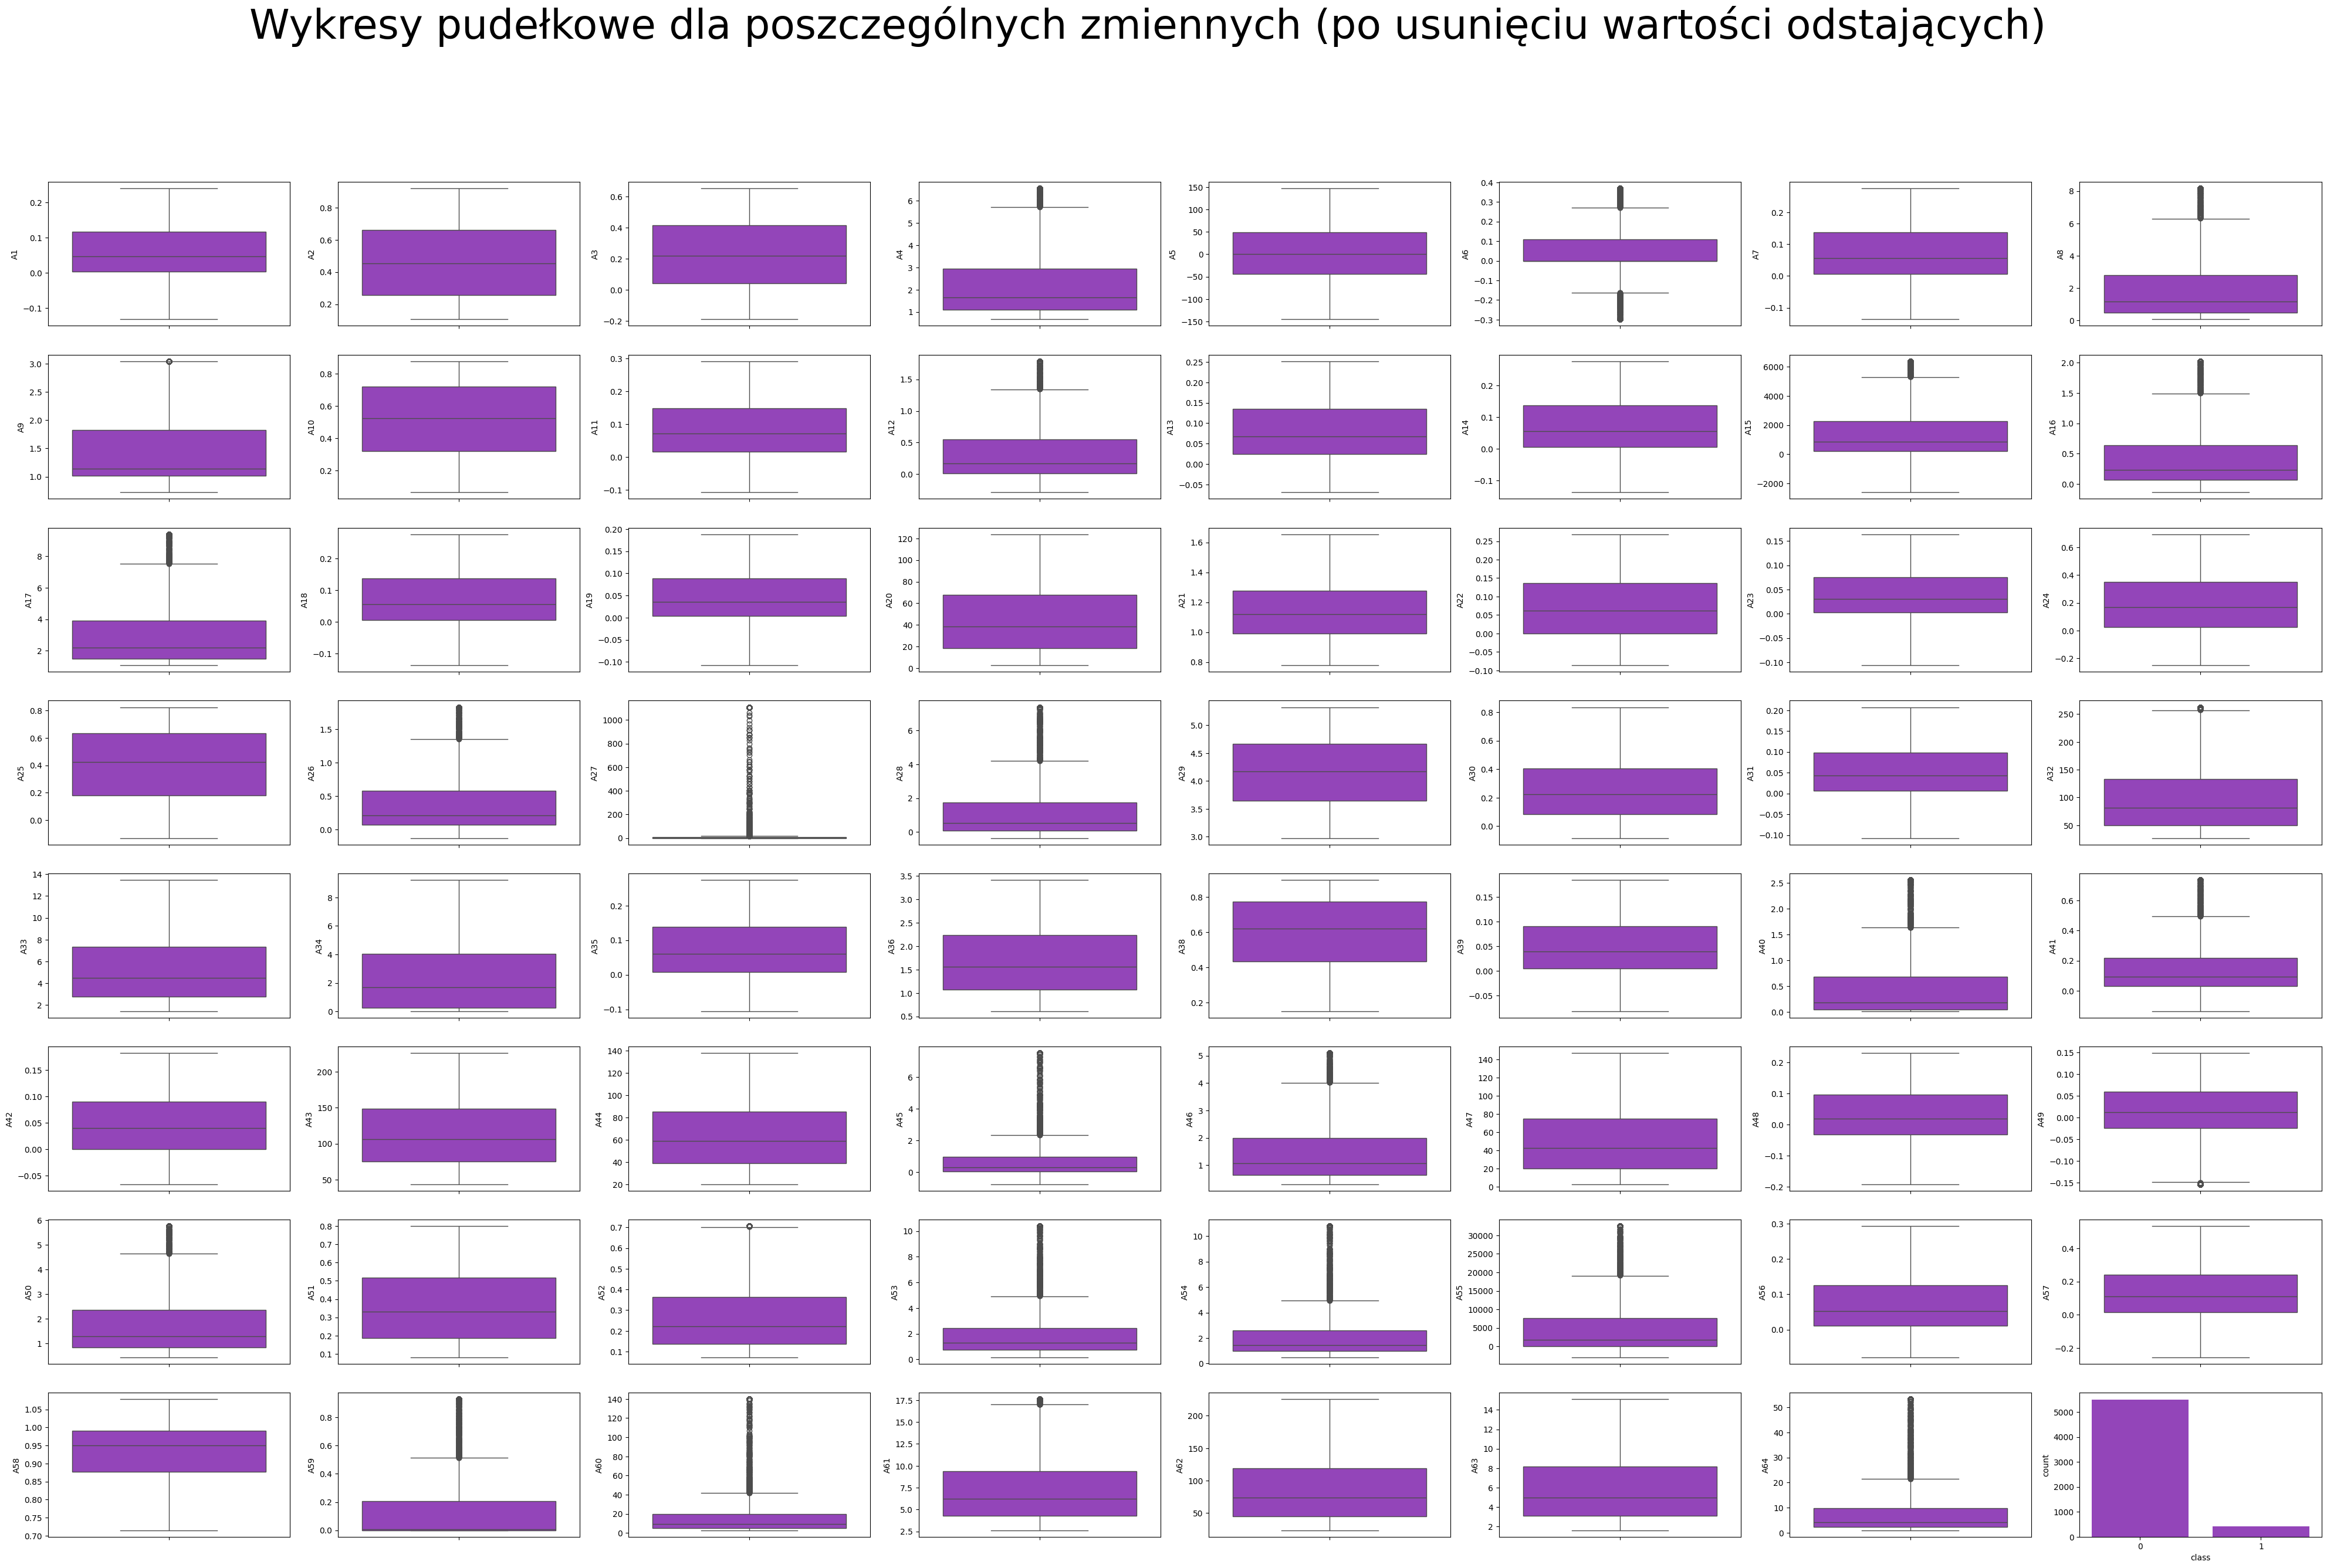

In [13]:
fig, axes = plt.subplots(8, 8, figsize=(50, 30))

for sublist in feature_list:
    for j in sublist:
        sns.boxplot(data = df5_cleaned2, y = j, color = 'darkorchid', ax = axes[feature_list.index(sublist), sublist.index(j)])

axes[7, 7].clear()
sns.countplot(data = df5_cleaned2, x = "class", color = 'darkorchid', ax = axes[7, 7])
        
plt.suptitle('Wykresy pudełkowe dla poszczególnych zmiennych (po usunięciu wartości odstających)', fontsize = 50)
plt.show()

### Standaryzacja

In [14]:
def standardize_df(df):
    df.iloc[:, 1:-1] = StandardScaler().fit_transform(df.iloc[:, 1:-1])
    return df

In [15]:
df5_cleaned3 = standardize_df(df5_cleaned2)

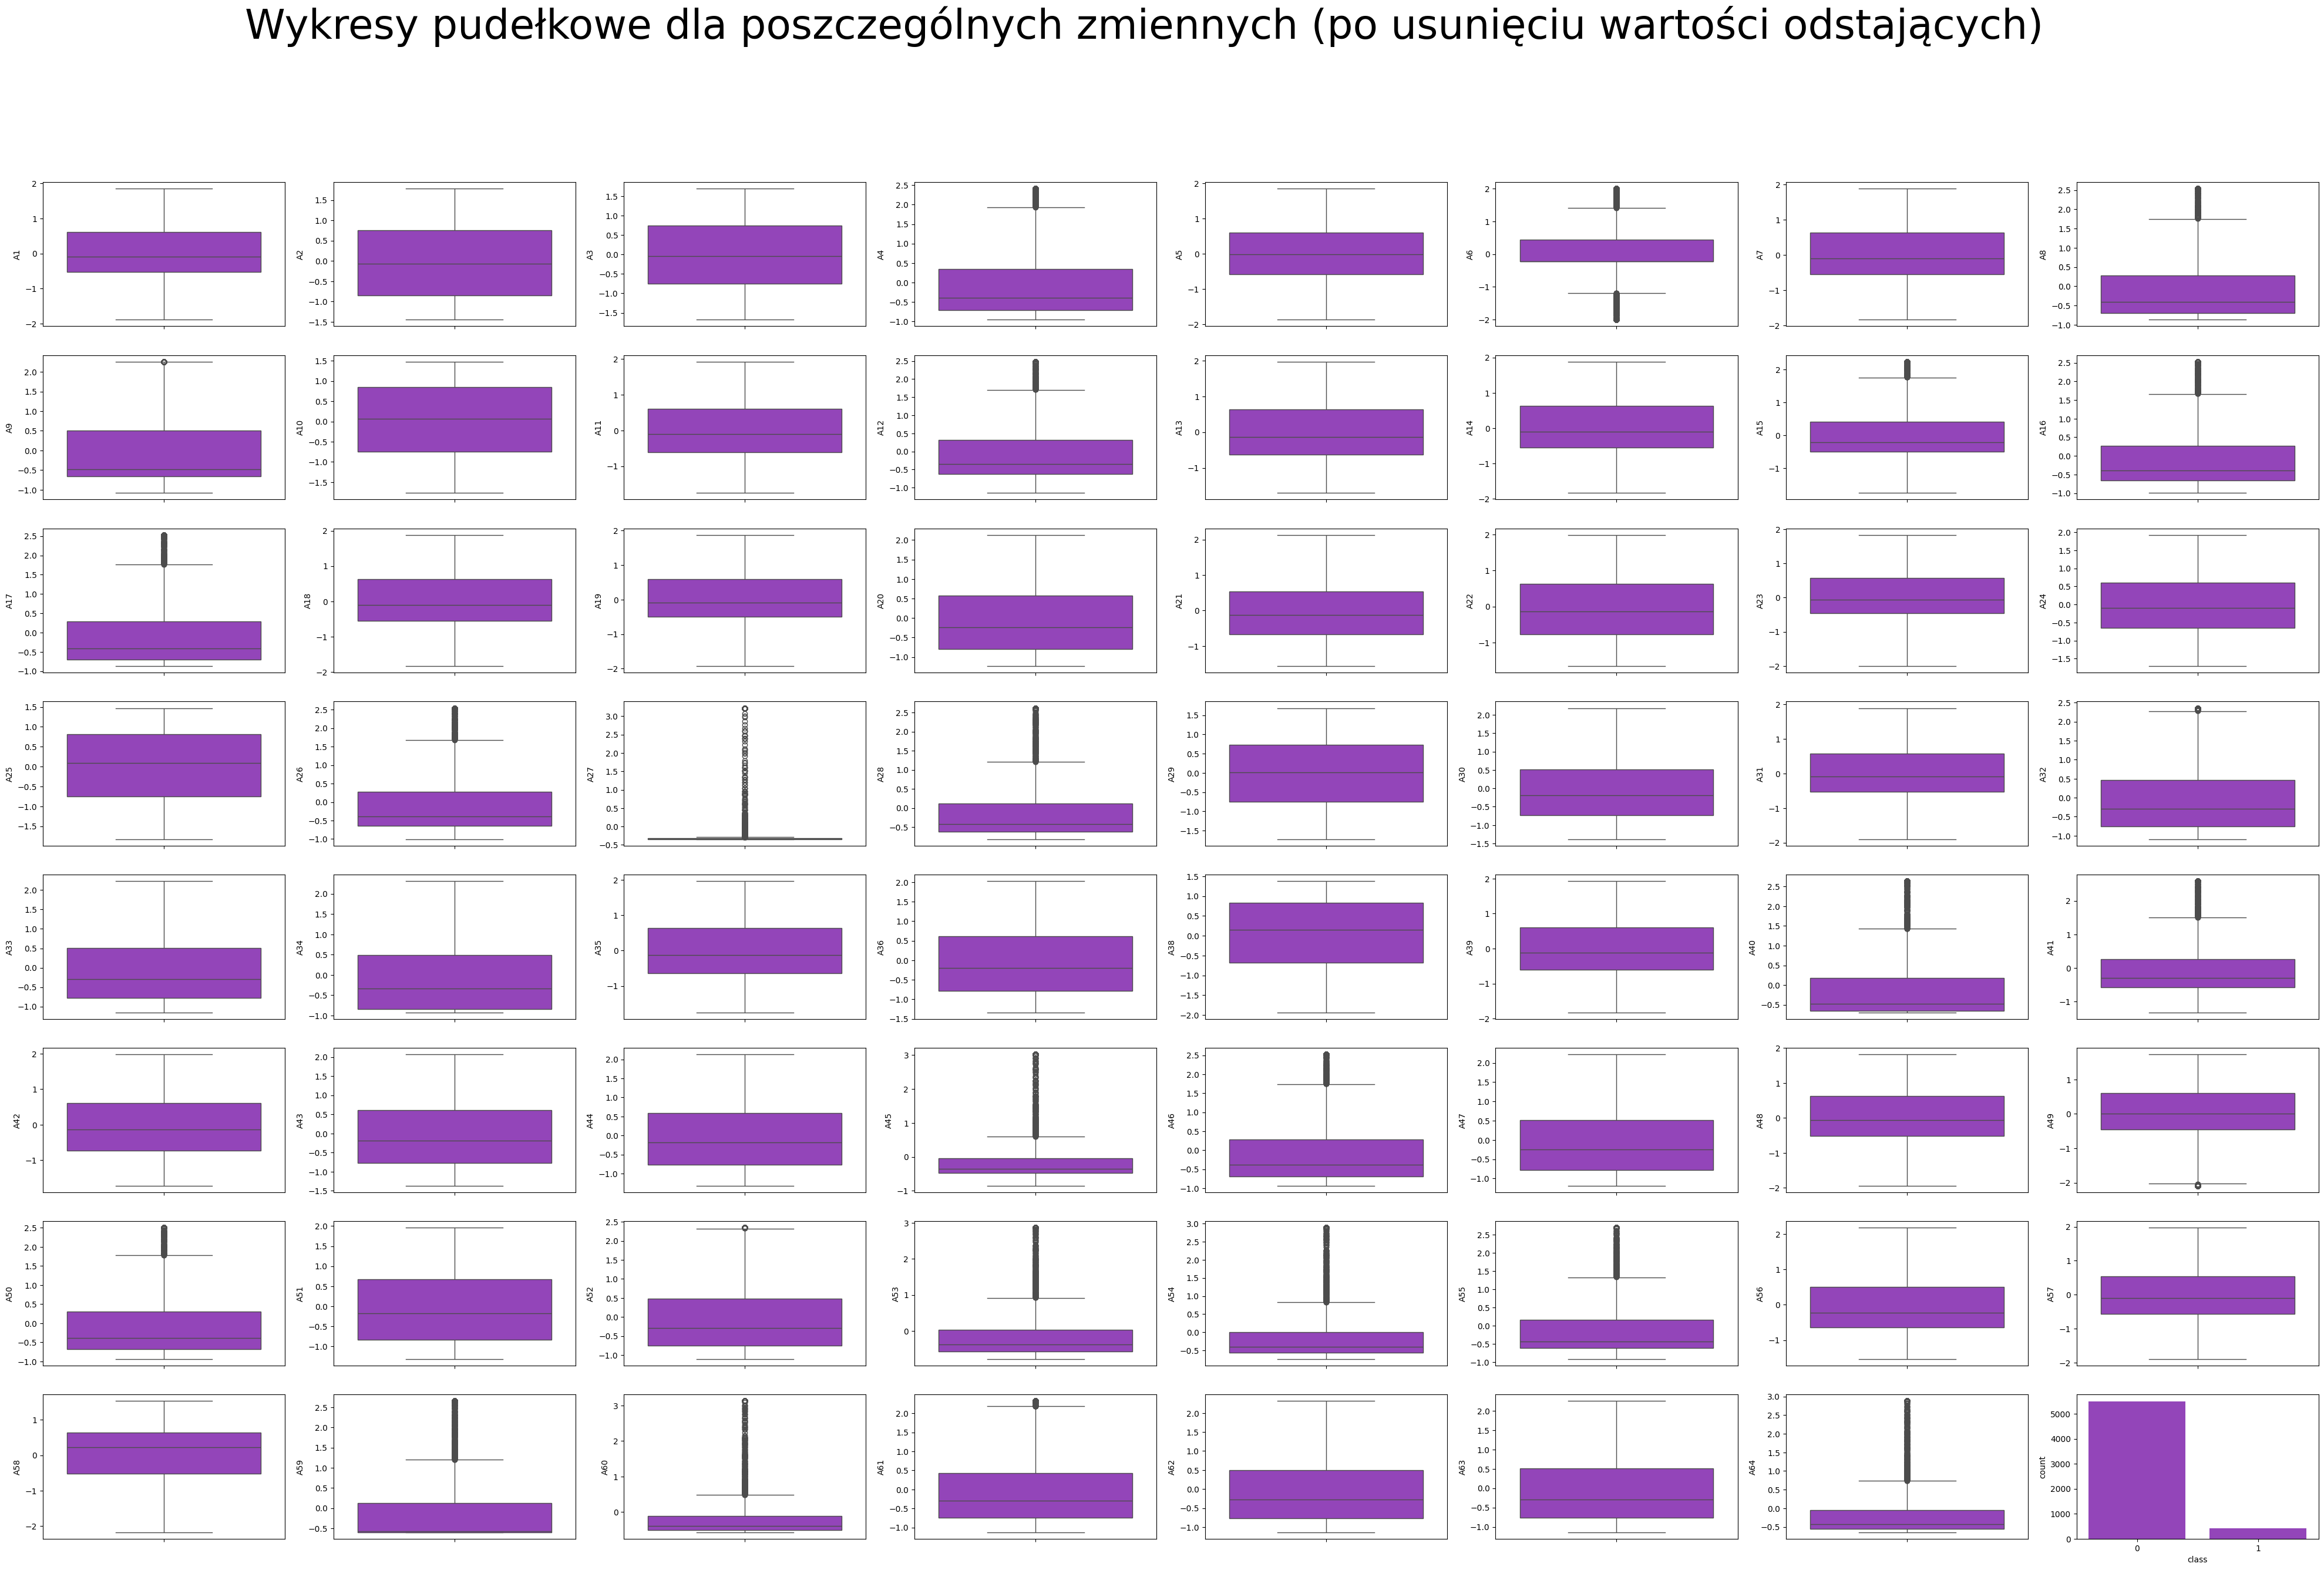

In [16]:
fig, axes = plt.subplots(8, 8, figsize=(50, 30))

for sublist in feature_list:
    for j in sublist:
        sns.boxplot(data = df5_cleaned3, y = j, color = 'darkorchid', ax = axes[feature_list.index(sublist), sublist.index(j)])

axes[7, 7].clear()
sns.countplot(data = df5_cleaned3, x = "class", color = 'darkorchid', ax = axes[7, 7])
        
plt.suptitle('Wykresy pudełkowe dla poszczególnych zmiennych (po usunięciu wartości odstających)', fontsize = 50)
plt.show()

### Odrzucenie cech na podstawie macierzy korelacji

Rozważmy pary cech z silną korelacją (przyjmijmy moduł z silnej korelacji za 0.8). Wśród wszystkich takich par będziemy odrzucać jedną cechę, ponieważ niesie ona taką samą informację jak ta pierwsza.

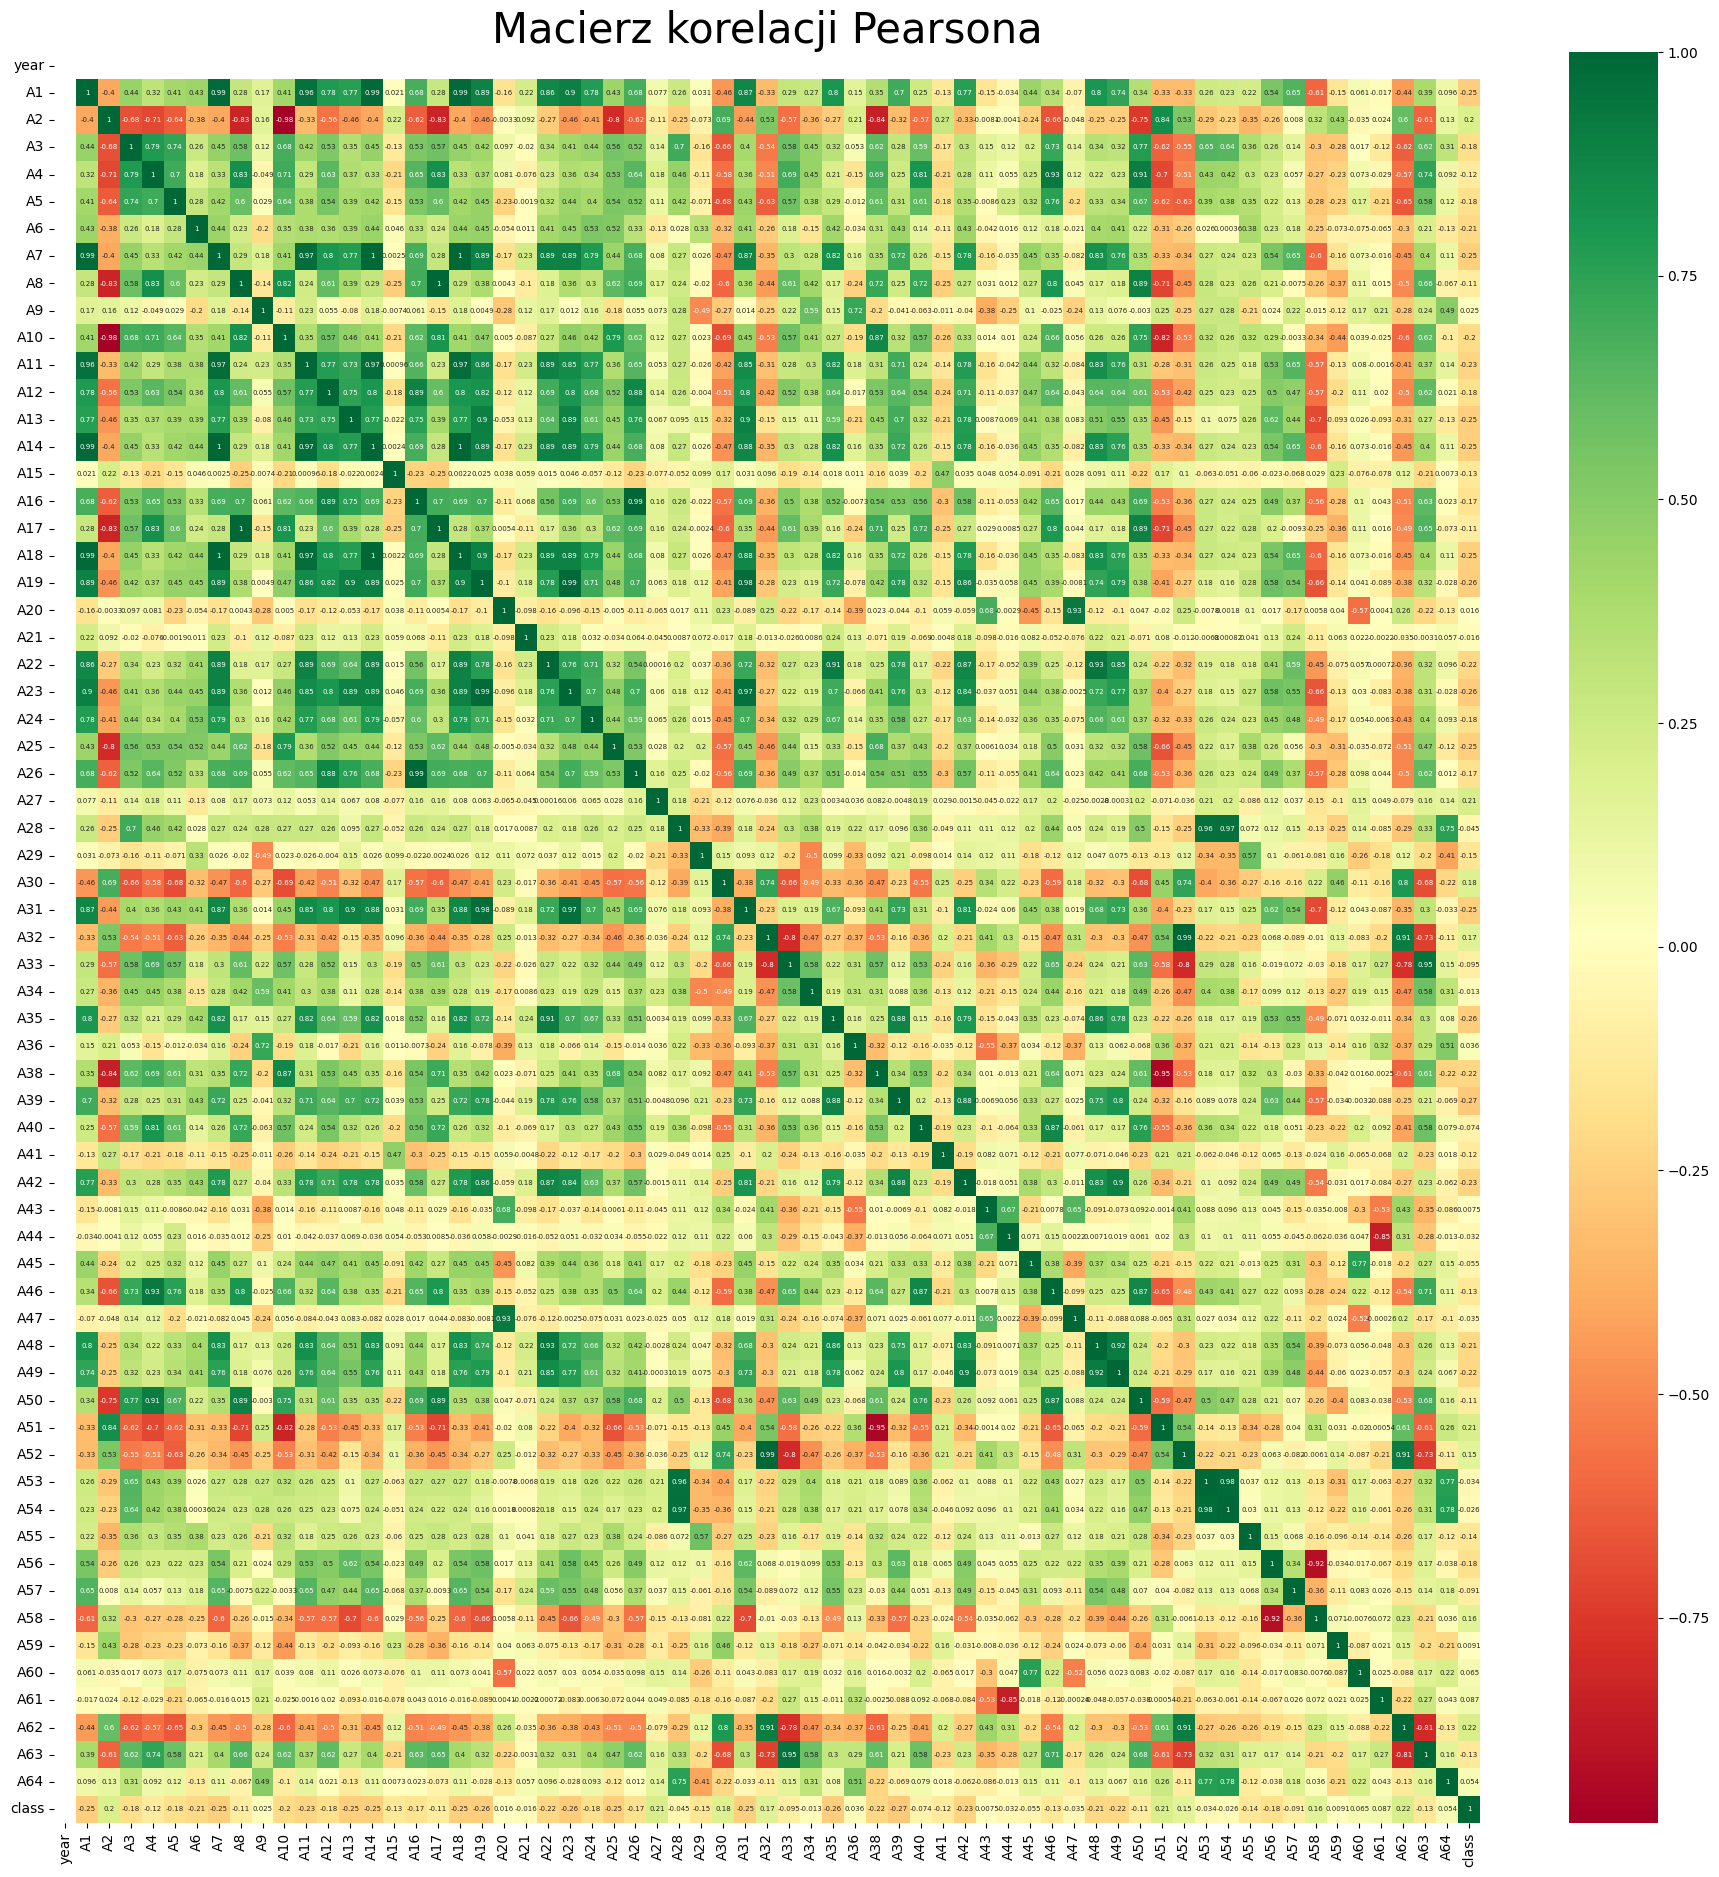

In [17]:
df_corr = df5_cleaned3.corr()
pearson_corr_features = df_corr.index

plt.figure(figsize = (23, 23))
sns.heatmap(df5_cleaned3[pearson_corr_features].corr(), annot = True, annot_kws={"fontsize" : 5},\
            cmap = 'RdYlGn')
plt.title('Macierz korelacji Pearsona', fontsize = 30)
plt.show()

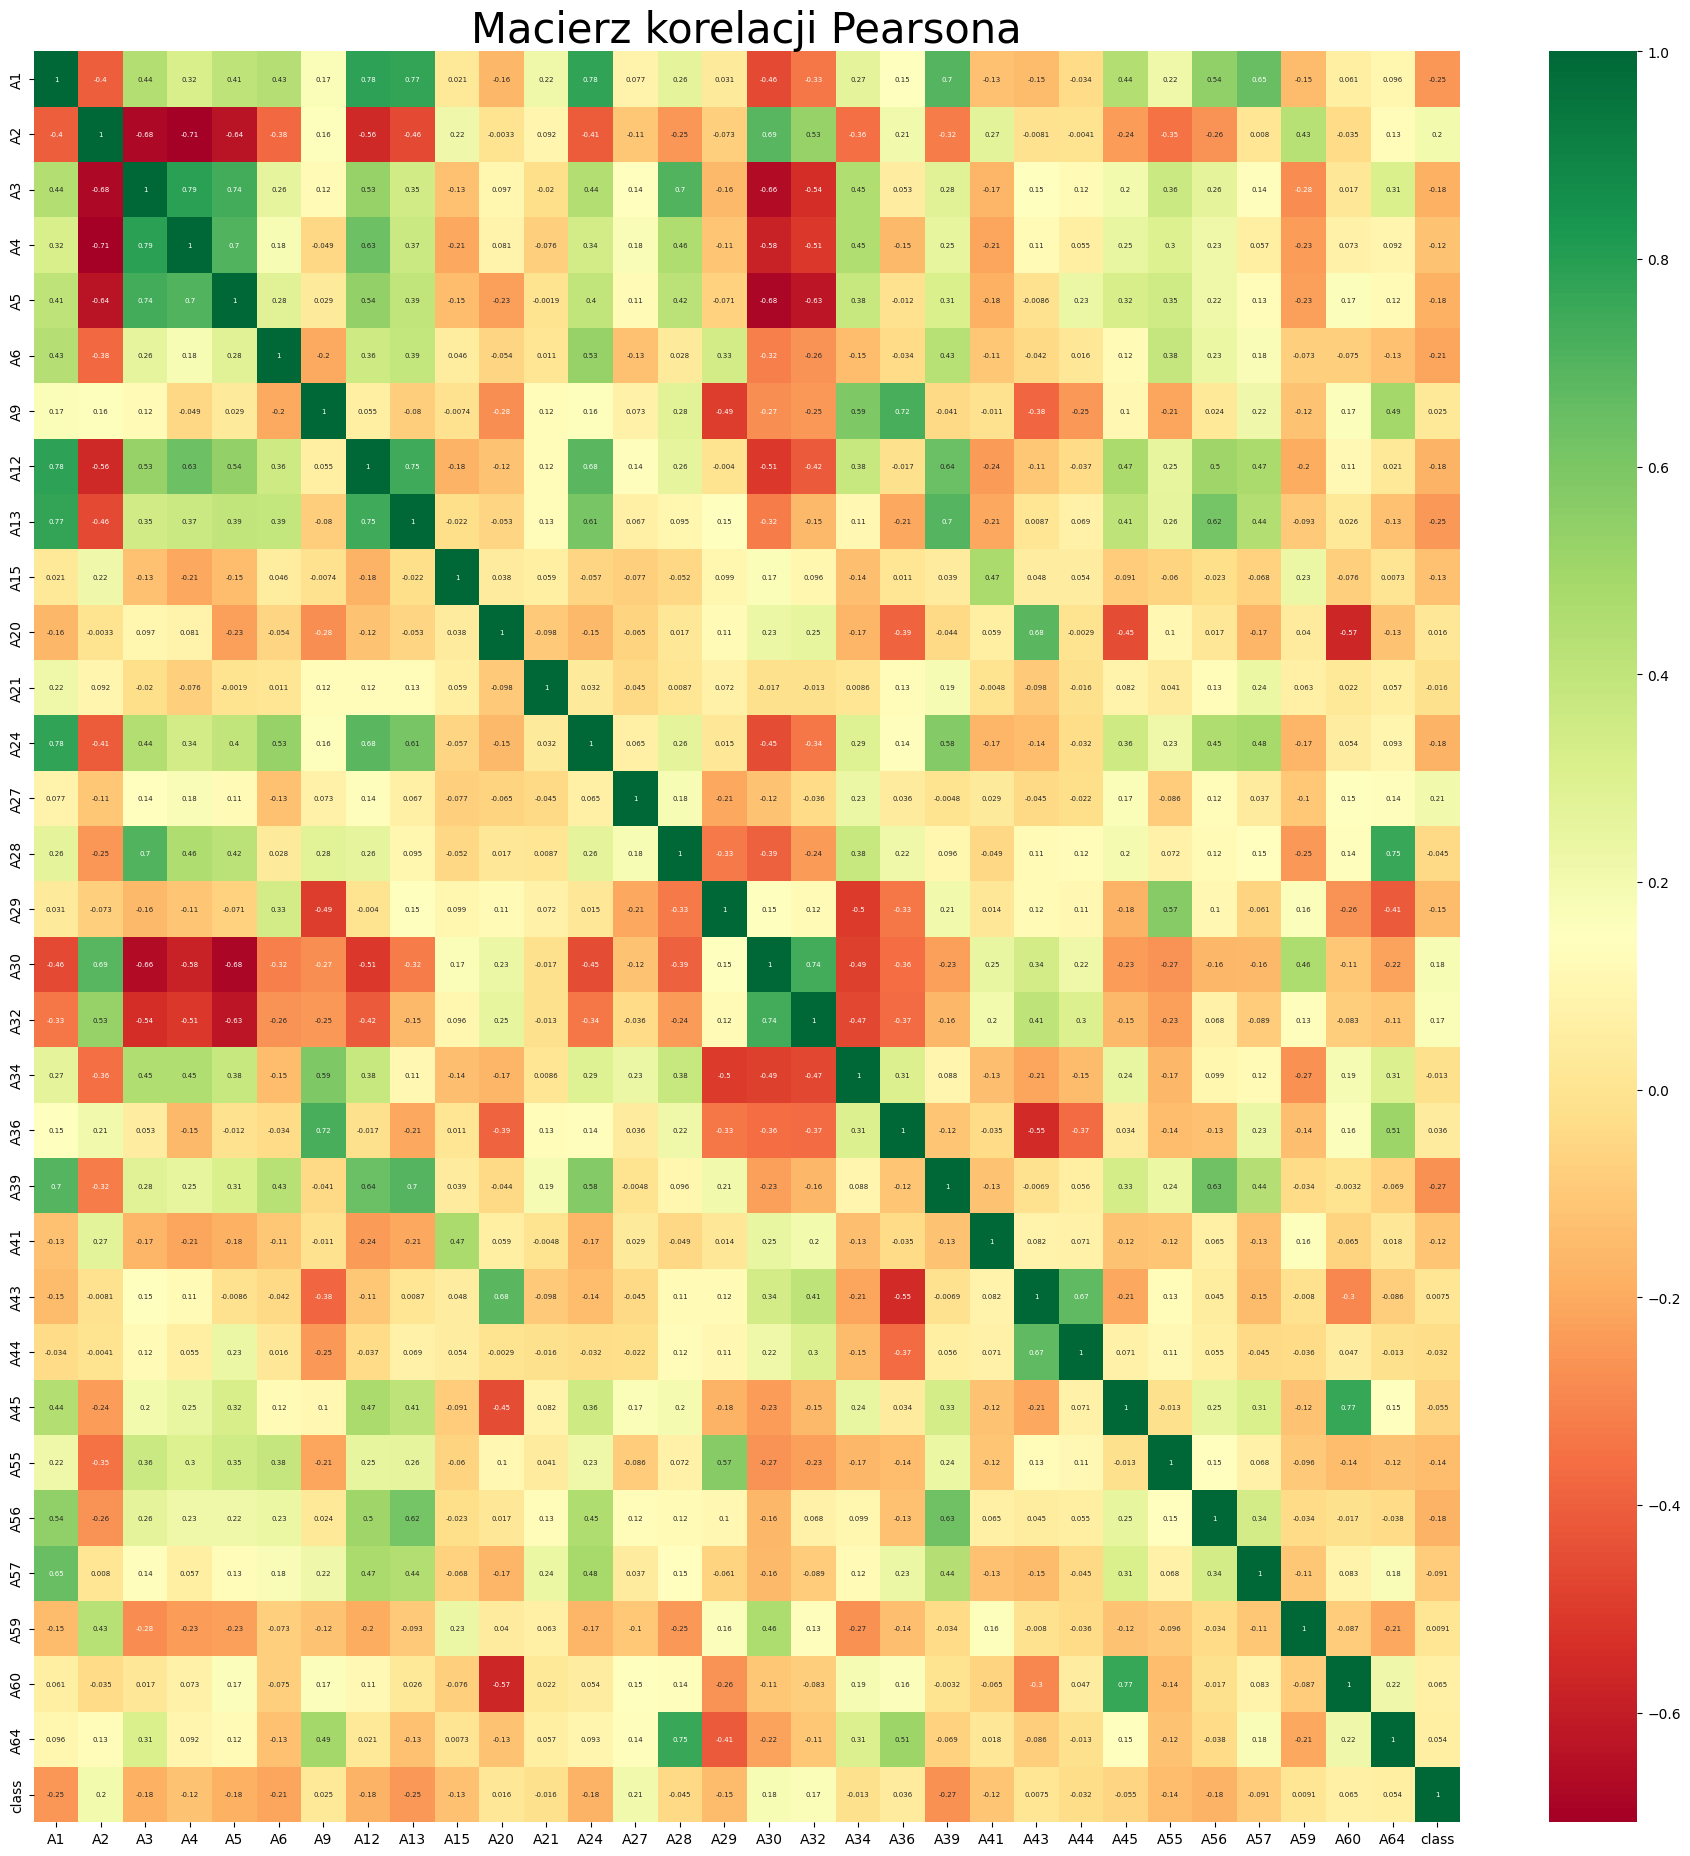

In [18]:
df5_cleaned4 = df5_cleaned3.drop(['A7', 'A8', 'A10', 'A11', 'A14',
                                  'A16', 'A17','A18', 'A19', 'A22',
                                  'A23', 'A25', 'A26', 'A31', 'A33',
                                  'A35', 'A38', 'A40', 'A42', 'A46',
                                  'A47', 'A48', 'A49', 'A50', 'A51', 'A52',
                                  'A53', 'A54', 'A58', 'A61', 'A62', 'A63'], axis = 1)

df_corr = df5_cleaned4.drop(['year'], axis = 1).corr()
pearson_corr_features = df_corr.index

plt.figure(figsize = (23, 23))
sns.heatmap(df5_cleaned4[pearson_corr_features].corr(), annot = True, annot_kws={"fontsize" : 5},\
            cmap = 'RdYlGn')
plt.title('Macierz korelacji Pearsona', fontsize = 30)
plt.show()

### Redukcja wymiarów (PCA i t-SNE)

Dane zostały przygotowane poprzez obsługę brakujących wartości, redukcje wartości odstających, oraz standaryzację.

In [19]:
X = df5_cleaned4.iloc[:, 1:-1]
y = df5_cleaned4.iloc[:, -1]

df_prepared = df5_cleaned4

**PCA**

In [20]:
pca = PCA(n_components = 3)

X_pca = pca.fit_transform(X)

In [21]:
df_pca = pd.DataFrame({'pca1' : X_pca[:, 0] 
                       ,'pca2' : X_pca[:, 1]
                       ,'pca3' : X_pca[:, 2]
                    #    ,'pca4' : X_pca[:, 3]
                    #    ,'pca5' : X_pca[:, 4]
                    #    ,'pca6' : X_pca[:, 5]
                       , 'class' : df_prepared['class'].values})
df_pca

pca1      pca2      pca3  class
0    -0.587506 -2.381963 -1.616418      0
1    -1.784797 -0.516101  1.377032      0
2     2.896449 -2.956886  1.110953      0
3    -3.254369 -1.386499 -0.255162      0
4    -0.938154 -1.458825 -1.164947      0
...        ...       ...       ...    ...
5905 -1.691438  0.204750 -1.828122      1
5906 -3.329872  3.974094 -0.539715      1
5907 -3.997587 -0.162822 -0.869340      1
5908 -4.383467  0.358398  1.146024      1
5909 -3.572775  0.815753  2.270617      1

[5910 rows x 4 columns]

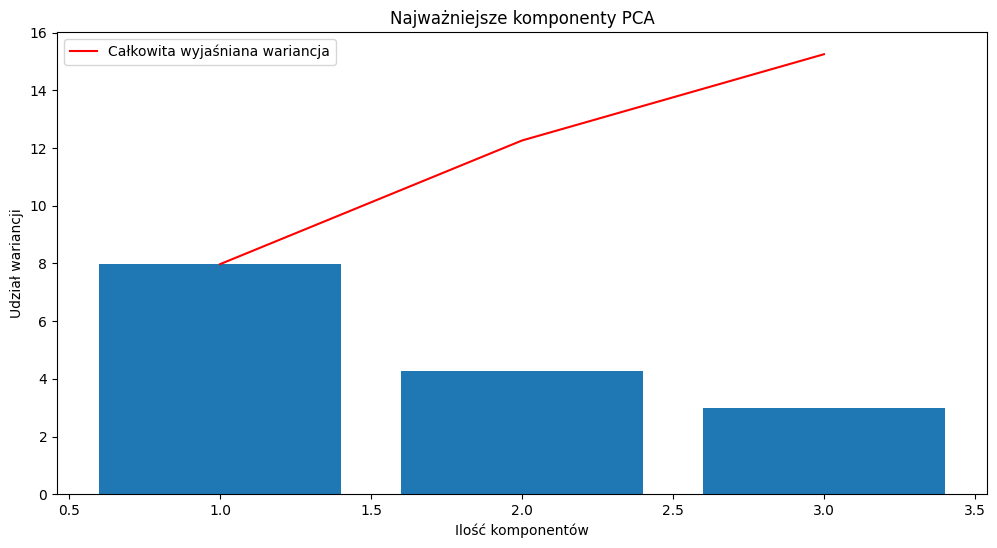

In [22]:
plt.figure(figsize =  (12, 6))
plt.bar(
    range(1,len(pca.explained_variance_) + 1),
    pca.explained_variance_
    )
 
plt.plot(
    range(1,len(pca.explained_variance_ ) + 1),
    np.cumsum(pca.explained_variance_),
    c='red',
    label='Całkowita wyjaśniana wariancja')
 
plt.legend(loc='upper left')
plt.xlabel('Ilość komponentów')
plt.ylabel('Udział wariancji')
plt.title('Najważniejsze komponenty PCA')
 
plt.show()

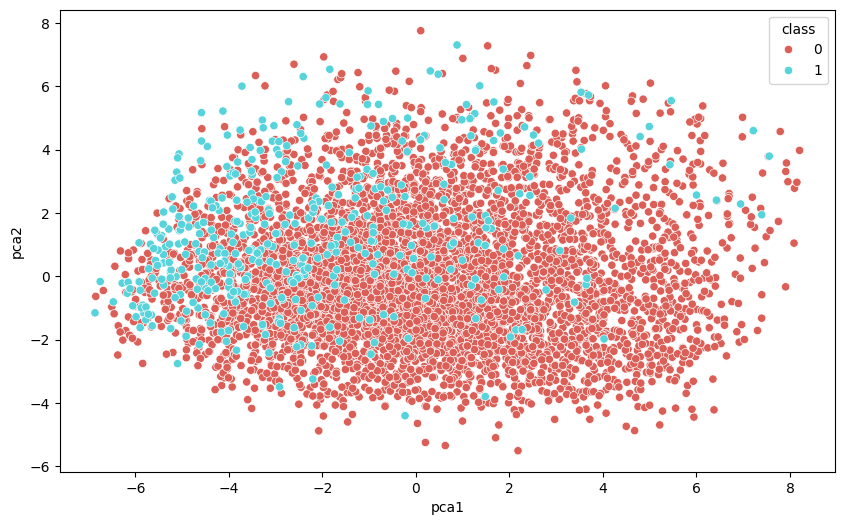

In [23]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df_pca, x = 'pca1', y = 'pca2', hue = 'class', palette = sns.color_palette('hls', 2))
plt.show()

**t-SNE**

In [24]:
tsne = TSNE(n_components = 3, perplexity = 25)
X_tsne = tsne.fit_transform(X)

In [25]:
df_tsne = pd.DataFrame({'tsne1' : X_tsne[:, 0] 
                       ,'tsne2' : X_tsne[:, 1]
                       ,'tsne3' : X_tsne[:, 2]
                       , 'class' : df_prepared['class'].values})
df_tsne

tsne1      tsne2      tsne3  class
0      4.059416  -8.770720 -10.759892      0
1     -6.224720  -1.809875   1.799280      0
2     14.984409 -13.671593  -0.749213      0
3    -17.309584 -10.111382  -6.523262      0
4      0.600698  -5.284898 -18.506067      0
...         ...        ...        ...    ...
5905 -16.437649  -2.955883 -13.942190      1
5906 -15.448196  13.967621   5.662232      1
5907 -18.424095  11.641082   5.182197      1
5908 -15.534097  10.728296  10.975229      1
5909 -15.875578  10.774891   9.239115      1

[5910 rows x 4 columns]

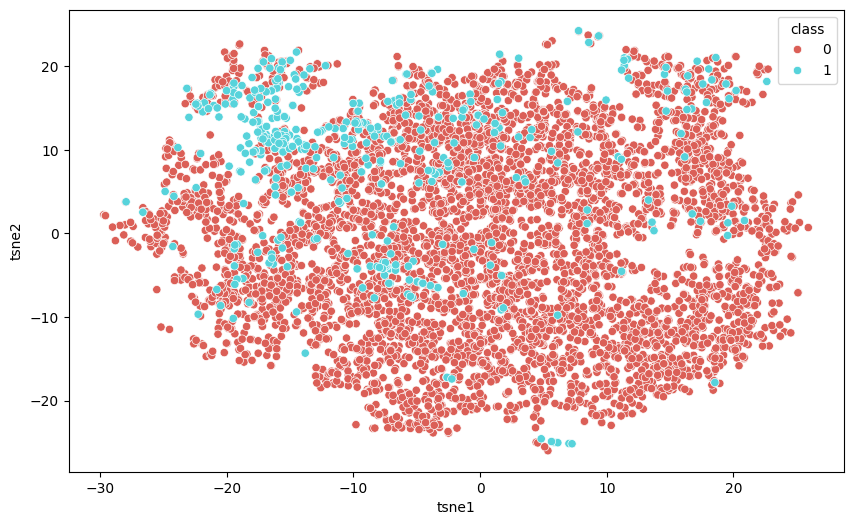

In [26]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = df_tsne, x = 'tsne1', y = 'tsne2', hue = 'class', palette = sns.color_palette('hls', 2))
plt.show()

### Klasyfikacja

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

**Drzewo decyzyjne**

In [29]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid = param_grid, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [30]:
print('Najlepsze parametry: ' + str(best_params))

Najlepsze parametry: {'criterion': 'gini', 'max_depth': 5, 'random_state': 42}


In [31]:
y_pred = best_model.predict(X_test)

In [32]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.952638700947226
0.7894736842105263
0.5625


**Las losowy**

In [33]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100],
    'random_state': [42]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid = param_grid, cv = 10, n_jobs = -1)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [34]:
print('Najlepsze parametry: ' + str(best_params))

Najlepsze parametry: {'criterion': 'gini', 'max_depth': 13, 'n_estimators': 100, 'random_state': 42}


In [35]:
y_pred = best_model.predict(X_test)

In [36]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9472259810554804
0.8048780487804879
0.4583333333333333


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1375
           1       0.80      0.32      0.46       103

    accuracy                           0.95      1478
   macro avg       0.88      0.66      0.72      1478
weighted avg       0.94      0.95      0.94      1478

